#### This is a ML project to be added to my portfolio. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
#### The goal is to build a classification model to predict whether a customer would be interested in ascertaining the product.



In [85]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import svm

In [4]:
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes)  
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

In [10]:
X.shape, y.shape

((45211, 16), (45211, 1))

In [11]:
type(bank_marketing)

ucimlrepo.dotdict.dotdict

In [14]:
bank_marketing.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,None,no
1,job,Feature,Categorical,Occupation,"type of job (categorical: 'admin.','blue-colla...",None,no
2,marital,Feature,Categorical,Marital Status,"marital status (categorical: 'divorced','marri...",None,no
3,education,Feature,Categorical,Education Level,"(categorical: 'basic.4y','basic.6y','basic.9y'...",None,no
4,default,Feature,Binary,None,has credit in default?,None,no
5,balance,Feature,Integer,None,average yearly balance,euros,no
6,housing,Feature,Binary,None,has housing loan?,None,no
7,loan,Feature,Binary,None,has personal loan?,None,no
8,contact,Feature,Categorical,None,contact communication type (categorical: 'cell...,None,yes
9,day_of_week,Feature,Date,None,last contact day of the week,None,no


In [25]:
print(type(bank_marketing.data.original))
# df = pd.DataFrame(bank_marketing)
# df.head()

<class 'pandas.core.frame.DataFrame'>


In [29]:
df = bank_marketing.data.original

In [31]:
df.shape

(45211, 17)

In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#####  Input variables:
   **bank client data** :
##### 1 - age (numeric)
##### 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
##### 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
##### 4 - education (categorical: "unknown","secondary","primary","tertiary")
##### 5 - default: has credit in default? (binary: "yes","no")
##### 6 - balance: average yearly balance, in euros (numeric) 
##### 7 - housing: has housing loan? (binary: "yes","no")
##### 8 - loan: has personal loan? (binary: "yes","no")
    **related with the last contact of the current campaign:**
##### 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
##### 10 - day: last contact day of the month (numeric)
##### 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
 ##### 12 - duration: last contact duration, in seconds (numeric)
   **other attributes:**
##### 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
##### 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
##### 15 - previous: number of contacts performed before this campaign and for this client (numeric)
##### 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

In [40]:
# Looking for Missing values
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [42]:
rows_with_null = df[df.isna().any(axis=1)]

# missing_rows = df[df.isnull().any(axis=1)]
# missing_rows
rows_with_null

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,NaN,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes


In [47]:
df['poutcome'].unique()

array([nan, 'failure', 'other', 'success'], dtype=object)

In [48]:
df['job'] = df['job'].fillna('Unknown')
df['education'] = df['education'].fillna('Unknown')
df['contact'] = df['contact'].fillna('Unknown')
df['poutcome'] = df['poutcome'].fillna('Unknown')



In [49]:
df.isnull().sum()


age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [62]:
# listing the categeorical variables which will need to be encoded to 
cat_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
df_copy = df.copy()


label_encoders = {}

for column in cat_variables:
    label_encoders[column] = LabelEncoder()
    df_copy[column] = label_encoders[column].fit_transform(df_copy[column])

In [64]:
X1 = df_copy.drop('y', axis=1)
y1 = df_copy['y']

In [79]:
yes_counts, no_counts = df['y'].value_counts()['yes'], df['y'].value_counts()['no']
yes_counts/no_counts



0.1324833425179099

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [73]:

df_copy1 = df_copy.copy()

df_copy1 = pd.get_dummies(df_copy1, columns=['y']) 



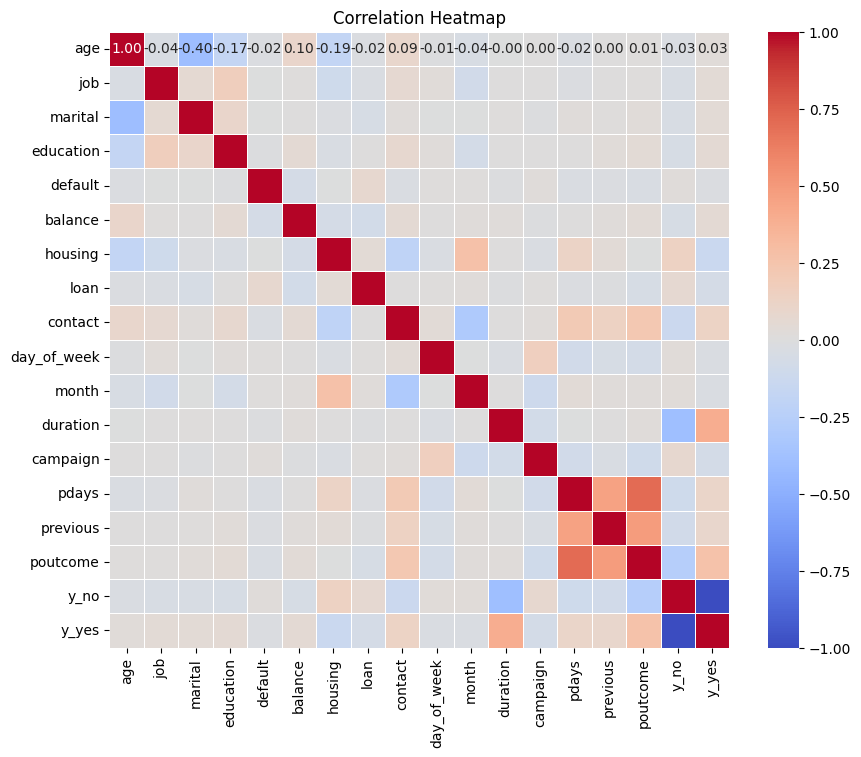

In [74]:
heat_map = df_copy1.corr()
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
sns.heatmap(heat_map, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [66]:
# Using a different model
rfc_model = RandomForestClassifier(n_estimators=50)

# fitting data to that model
rfc_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [68]:
y_pred_0 = rfc_model.predict(X_test)

In [69]:
# Evaluate the Random Forest Classifier model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_0))
print("Classification Report:\n", classification_report(y_test, y_pred_0))
print("Accuracy Score:", accuracy_score(y_test, y_pred_0))

Confusion Matrix:
 [[7711  241]
 [ 636  455]]
Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.95      7952
         yes       0.65      0.42      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.73      9043
weighted avg       0.89      0.90      0.89      9043

Accuracy Score: 0.9030189096538759


In [80]:
# Initializing the Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fitting the data to the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
y_pred_1 = dt_classifier.predict(X_test)


In [84]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_1))
print('Classification Report: \n', classification_report(y_test, y_pred_1))
print('Accuracy Score: \n', accuracy_score(y_test, y_pred_1))

Confusion Matrix: 
 [[7357  595]
 [ 562  529]]
Classification Report: 
               precision    recall  f1-score   support

          no       0.93      0.93      0.93      7952
         yes       0.47      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.70      9043
weighted avg       0.87      0.87      0.87      9043

Accuracy Score: 
 0.872055733716687


In [87]:
svm_clf = svm.SVC()

svm_clf.fit(X_train, y_train)
    
    

SVC()

In [89]:
y_pred_2 = svm_clf.predict(X_test)

In [90]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_2))
print('Classification Report: \n', classification_report(y_test, y_pred_2))
print('Accuracy Score: \n', accuracy_score(y_test, y_pred_2))

Confusion Matrix: 
 [[7946    6]
 [1084    7]]
Classification Report: 
               precision    recall  f1-score   support

          no       0.88      1.00      0.94      7952
         yes       0.54      0.01      0.01      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.50      0.47      9043
weighted avg       0.84      0.88      0.82      9043

Accuracy Score: 
 0.8794647793873714
